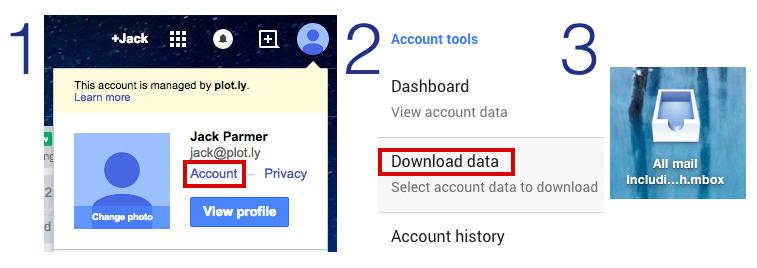

In [31]:
from IPython.display import Image
Image('http://i.imgur.com/SYija2N.png')

#### Installations
Download your Gmail inbox as a ".mbox" file by clicking on "Account" under your Gmail user menu, then "Download data". Install the Python libraries mailbox and dateutils with `sudo pip install mailbox` and `sudo pip install dateutils`.

In [12]:
import plotly.plotly as py
import plotly.graph_objs as go

import mailbox
from email.utils import parsedate
from dateutil.parser import parse
import itertools

In [13]:
path = '/Users/jack/Desktop/All mail Including Spam and Trash.mbox'

Open your ".mbox" file with <code>mailbox</code>

In [22]:
mbox = mailbox.mbox(path)

#### Sort your mailbox by date

In [23]:
def extract_date(email):
    date = email.get('Date')
    return parsedate(date)

sorted_mails = sorted(mbox, key=extract_date)
mbox.update(enumerate(sorted_mails))
mbox.flush()

Organize dates of email receipt as a list

In [24]:
all_dates = []
mbox = mailbox.mbox(path)
for message in mbox:
    all_dates.append( str( parse( message['date'] ) ).split(' ')[0] )

Count and graph emails received per day

In [26]:
email_count = [(g[0], len(list(g[1]))) for g in itertools.groupby(all_dates)]
email_count[0]

('2013-11-05', 1)

In [28]:
x = []
y = []
for date, count in email_count:
    x.append(date)
    y.append(count)
    
py.iplot( [ go.Scatter( x=x, y=y ) ] )

##### Restyle the chart in Plotly's GUI

In [10]:
import plotly.tools as tls
tls.embed('https://plot.ly/~jackp/3266')

In [1]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install publisher --upgrade
import publisher
publisher.publish(
    'gmail.ipynb', 'ipython-notebooks/graph-gmail-inbox-data/',
    'Graph Gmail inbox data with IPython notebook', 
    'Learn how to graph your Gmail inbox data with plotly and IPython Notebook',
    name='Graph Gmail Inbox Data')

Requirement already up-to-date: publisher in /Users/chelsea/venv/venv2.7/lib/python2.7/site-packages


/Users/chelsea/venv/venv2.7/lib/python2.7/site-packages/IPython/nbconvert.py:13: ShimWarning: The `IPython.nbconvert` package has been deprecated since IPython 4.0. You should import from nbconvert instead.
  "You should import from nbconvert instead.", ShimWarning)
/Users/chelsea/venv/venv2.7/lib/python2.7/site-packages/publisher/publisher.py:53: UserWarning: Did you "Save" this notebook before running this command? Remember to save, always save.
  warnings.warn('Did you "Save" this notebook before running this command? '
